<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 5</p><br>

In [2]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

##
<span style="font-wight:bold;font-size:20px">1. Text Data analysis:</span> using “lincoln-last-speech.txt” which contains Lincoln’s last public address. Now answer the following questions and include your codes.

##### a) Read the text and store the text in lAddress. Show the first 70 characters from the first element of the text.

In [4]:
with open ("data/lincoln-last-speech.txt") as file:
    lAddress = file.read()
    print(lAddress[:71])

We meet this evening, not in sorrow, but in gladness of heart. The evac


##### b) Now we are interested in the words used in his speech. Extract all the words from lAddress, convert all of them to lower case and store the result in vWord. Display first few words.

In [8]:
%%timeit
list_char = [i for i in lAddress if i not in string.punctuation]
lAddress2 = "".join(list_char) 
lAddress2 = lAddress2.lower()

1.05 ms ± 4.71 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
%%timeit
a = (i for i in lAddress)
b = filter(lambda i : i in string.punctuation, a)
lAddress2 = "".join(b) 
lAddress2 = lAddress2.lower()

2.04 ms ± 42.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit
lAddress2 = "".join((i for i in lAddress if i not in string.punctuation)) 
lAddress2 = lAddress2.lower()

1.43 ms ± 62.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%%timeit
lAddress2 = "".join((i.lower() for i in lAddress if i not in string.punctuation)) 

2.28 ms ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%%timeit
table = str.maketrans(string.ascii_uppercase, string.ascii_lowercase, string.punctuation)
lAddress_map = lAddress.translate(table)

27.5 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [6]:
table = str.maketrans(string.ascii_uppercase, string.ascii_lowercase, string.punctuation)
lAddress_map = lAddress.translate(table)

Kind of tokenize [link](http://text-processing.com/demo/tokenize/)

In [7]:
word_token = word_tokenize(lAddress_map)
word_token[:5]

['we', 'meet', 'this', 'evening', 'not']

In [9]:
%%timeit
vWord=[]
with open('data/lincoln-last-speech.txt','r') as IAddress:
    for line in IAddress:
        for word in line.split():
            w=re.sub(r'[\.\,]','', word)
            vWord.append(w.lower())
vWord[0:5]

3.12 ms ± 82.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
vWord=[]
vap = vWord.append
with open('data/lincoln-last-speech.txt','r') as IAddress:
    for line in IAddress:
        for word in line.split():
            w=re.sub(r'[\.\,]','', word)
            vap(w.lower())
vWord[0:5]

3.06 ms ± 43.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### c) The words like am, is, my or through are not much of our interest and these types of words are called stop-words. Get all the English stop words and store them in sWord. Display few stop words in your report.

In [11]:
sWord = stopwords.words("english")
sWord[0:5]

['i', 'me', 'my', 'myself', 'we']

##### d) Remove all the sWord from vWord and store the result in cleanWord. Display first few clean words.

In [12]:
%%timeit
cleanWord = [w for w in word_token if w not in sWord ]

5.12 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
cleanWord=np.delete(word_token,np.where(np.isin(word_token,sWord)))

1.89 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit
cleanWord = set(word_token) - set(sWord)

117 µs ± 1.91 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [16]:
cleanWord = sorted([w for w in word_token if w not in sWord ])
cleanWord2 = sorted(set(word_token) - set(sWord))
cleanWord == cleanWord2

False

In [19]:
len(cleanWord), len(cleanWord2)

(830, 535)

##### f) Construct a bar chart showing the count of each words for the 15 most frequently used words.

In [41]:
%%timeit
tmp = pd.Series(cleanWord).value_counts()
a = tmp[:15]

900 µs ± 66.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
tmp = pd.Series(cleanWord).value_counts()
tmp

louisiana     18
government    12
union         11
plan          11
states        10
              ..
gathering      1
gallant        1
front          1
friends        1
means          1
Length: 535, dtype: int64

In [43]:
%%timeit
tmp = pd.Series(cleanWord).value_counts(sort=False)
b = tmp.nlargest(15)

1.5 ms ± 73.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [44]:
%%timeit
tmp = pd.Series(cleanWord).value_counts()
b = tmp.nlargest(15)

1.81 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
tmp = pd.Series(cleanWord).value_counts()
a = tmp[:15]  # Doen't need "sort_values method"
b = tmp.nlargest(15)

In [45]:
pd.DataFrame({
    'a':a.index,
    'av':a.values,
    'b':b.index,
    'bv':b.values,
})

,a,av,b,bv
0,louisiana,18,louisiana,18
1,government,12,government,12
2,union,11,plan,11
3,plan,11,union,11
4,states,10,new,10
5,new,10,state,10
6,state,10,states,10
7,would,8,proper,8
8,proper,8,would,8
9,question,7,question,7


<AxesSubplot: >

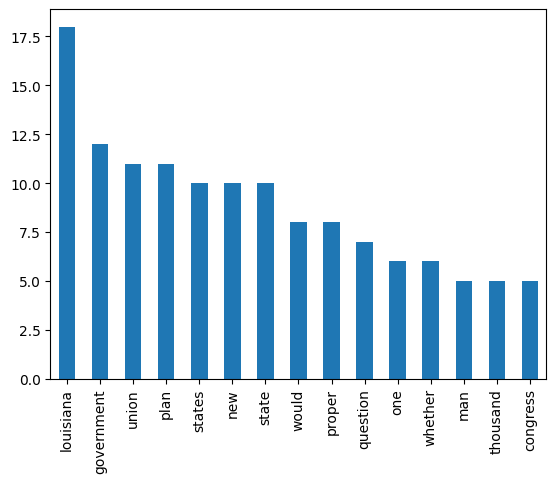

In [18]:
tmp[:15].plot(kind = "bar")

##### h) The plot in question (1f) uses bar plot to display the data. Can you think of another plot that delivers the same information but looks much simpler? Demonstrate your answer by generating such a plot.

In [19]:
def my_wordcloud(my_txt):
    wordcloud = WordCloud(width = 800, height = 800, 
                          background_color ='black', 
                          colormap='Set2',
                          collocations=False,
                          stopwords = stopwords.words('english'),
                          min_font_size = 10).generate(my_txt)

    plt.figure(figsize = (3, 3), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()

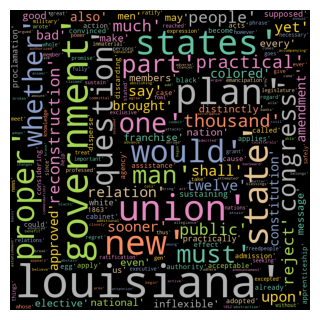

In [22]:
my_wordcloud(str(cleanWord))

##
<span style="font-wight:bold;font-size:20px">2. Answering Questions from Data:</span> Download the data from [ 
https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/flights.csv ]. Answer the following questions using this data.


In [27]:
data = pd.read_csv('data/flights.zip')

In [59]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,336766,336767,336768,336769,336770,336771,336772,336773,336774,336775
year,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013
month,1,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,9,9,9
day,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,30
dep_time,517.0,533.0,542.0,544.0,554.0,554.0,555.0,557.0,557.0,558.0,...,2240.0,2241.0,2307.0,2349.0,NaN,NaN,NaN,NaN,NaN,NaN
sched_dep_time,515,529,540,545,600,558,600,600,600,600,...,2250,2246,2255,2359,1842,1455,2200,1210,1159,840
dep_delay,2.0,4.0,2.0,-1.0,-6.0,-4.0,-5.0,-3.0,-3.0,-2.0,...,-10.0,-5.0,12.0,-10.0,NaN,NaN,NaN,NaN,NaN,NaN
arr_time,830.0,850.0,923.0,1004.0,812.0,740.0,913.0,709.0,838.0,753.0,...,2347.0,2345.0,2359.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN
sched_arr_time,819,830,850,1022,837,728,854,723,846,745,...,7,1,2358,350,2019,1634,2312,1330,1344,1020
arr_delay,11.0,20.0,33.0,-18.0,-25.0,12.0,19.0,-14.0,-8.0,8.0,...,-20.0,-16.0,1.0,-25.0,NaN,NaN,NaN,NaN,NaN,NaN
carrier,UA,UA,AA,B6,DL,UA,B6,EV,B6,AA,...,B6,B6,B6,B6,EV,9E,9E,MQ,MQ,MQ


In [60]:
data.year.unique()

array([2013], dtype=int64)

##### a) What month had the highest proportion of cancelled flights? What month had the lowest? Interpretany seasonal patterns. Please produce a plot that illustrates the proportion of cancelled flights for each month.

In [33]:
monthly_cancelation = data.loc[data["dep_time"].isnull(), 'month'].value_counts()
monthly_cancelation

2     1261
12    1025
6     1009
7      940
3      861
4      668
5      563
1      521
8      486
9      452
10     236
11     233
Name: month, dtype: int64

In [34]:
monthly_flight = data.month.value_counts()
monthly_flight

7     29425
8     29327
10    28889
3     28834
5     28796
4     28330
6     28243
12    28135
9     27574
11    27268
1     27004
2     24951
Name: month, dtype: int64

In [35]:
monthly_flight[13]=75484
monthly_flight

7     29425
8     29327
10    28889
3     28834
5     28796
4     28330
6     28243
12    28135
9     27574
11    27268
1     27004
2     24951
13    75484
Name: month, dtype: int64

In [36]:
monthly_cancelation_proportion = monthly_cancelation / monthly_flight
monthly_cancelation_proportion

1     0.019293
2     0.050539
3     0.029861
4     0.023579
5     0.019551
6     0.035726
7     0.031946
8     0.016572
9     0.016392
10    0.008169
11    0.008545
12    0.036431
13         NaN
Name: month, dtype: float64

In [31]:
monthly_cancelation_proportion.apply({
    'highest proportion of cancelation:':'argmax',
    'lowest proportion of cancelation:':'argmin'
})

highest proportion of cancelation:    1
lowest proportion of cancelation:     9
Name: month, dtype: int64

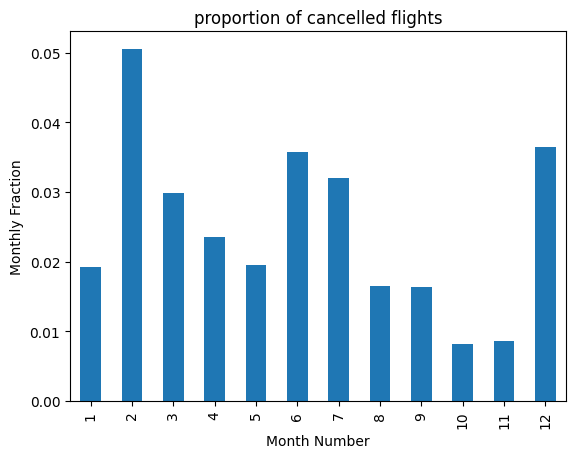

In [32]:
ax = monthly_cancelation_proportion.plot(kind = "bar")
_ = ax.set(
    title = 'proportion of cancelled flights',
    xlabel= 'Month Number',
    ylabel='Monthly Fraction'
)

In [228]:
data["is_canceled"] = data["arr_time"].isna() # .apply(lambda x: True if x else False) 

In [ ]:
data['Cancel']=data['arr_time'].apply(lambda x:True if x==0 else False)

In [231]:
%%timeit
data.groupby("month",as_index=True).sum()["is_canceled"]

<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid fo

43.7 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<magic-timeit>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [232]:
%%timeit
data.groupby("month",as_index=True).is_canceled.sum()

11.4 ms ± 85.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [239]:
%%timeit
data.groupby("month",as_index=True).size()

11.3 ms ± 641 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [240]:
%%timeit
data.month.value_counts(sort=False)

4.09 ms ± 56 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### b) What plane (specified by the tailnum variable) traveled the most times from New York City airports in 2013? Plot the number of trips per week over the year.

In [37]:
data.origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [38]:
'JFK LGA EWR'.split()

['JFK', 'LGA', 'EWR']

In [41]:
NY_mask = data.origin.isin('JFK LGA EWR'.split())

In [42]:
NY_mask.sum(), len(data)

(336776, 336776)

In [44]:
data.loc[NY_mask, 'tailnum'].value_counts().idxmax()

'N725MQ'

In [93]:
%%timeit
data.loc[NY_mask, 'tailnum'].value_counts().nlargest(1)

46 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [95]:
%%timeit
(data[(data["year"]==2013)&(data["origin"]=="JFK")|(data["origin"]=="LGA")|(data["origin"]=="EWR")]
 .groupby(["tailnum"])["tailnum"]
 .count()
 .nlargest(1))

203 ms ± 8.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [270]:
tailnum_flies = data.loc[NY_mask, 'tailnum'].value_counts()
most_traveled = tailnum_flies.idxmax()
most_traveled, tailnum_flies[most_traveled]

('N725MQ', 575)

In [45]:
date = pd.to_datetime(data['year month day'.split()])

In [46]:
date

0        2013-01-01
1        2013-01-01
2        2013-01-01
3        2013-01-01
4        2013-01-01
            ...    
336771   2013-09-30
336772   2013-09-30
336773   2013-09-30
336774   2013-09-30
336775   2013-09-30
Length: 336776, dtype: datetime64[ns]

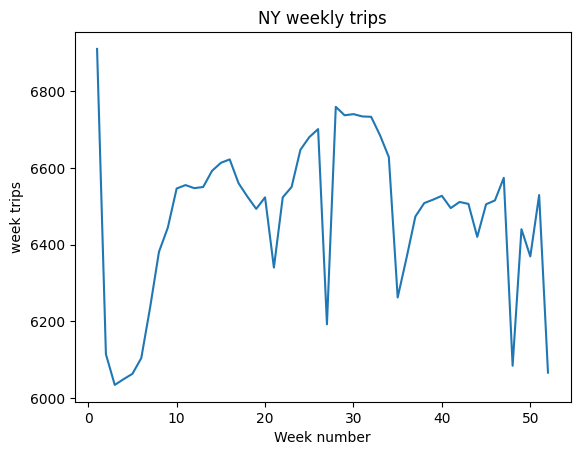

In [155]:
weekly_trip = date.dt.isocalendar().week.value_counts(sort=False)
weekly_trip.sort_index(inplace=True)
ax = weekly_trip.plot()
_ = ax.set(xlabel='Week number', ylabel='week trips', title='NY weekly trips')

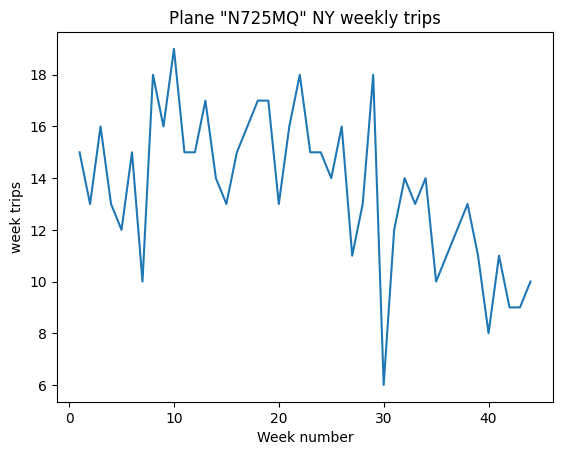

In [156]:
date = pd.to_datetime(data.loc[data.tailnum == most_traveled, 'year month day'.split()])
weekly_trip = date.dt.isocalendar().week.value_counts(sort=False)
weekly_trip.sort_index(inplace=True)
ax = weekly_trip.plot()
_ = ax.set(xlabel='Week number', ylabel='week trips', title=f'Plane "{most_traveled}" NY weekly trips')

##### c) Download the plane data from [ https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/planes.csv ]. Use the flights and planes tables to answer the following questions: What is the oldest plane (specified by the tailnum variable) that flew from New York City airports in 2013? How many airplanes that flew from New York City are included in the planes table?

In [48]:
df = pd.read_csv('data/planes.csv', index_col='tailnum')
df.head(3)

,year,type,manufacturer,model,engines,seats,speed,engine
tailnum,,,,,,,,
N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan


In [260]:
df.index.duplicated().sum()

0

In [120]:
data_NY = data.loc[NY_mask]
data_NY.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00


In [137]:
tailnum_NY = set(data_NY.tailnum.unique())
planes_tailnames = set(df.index)
in_both = tailnum_NY & planes_tailnames
print(f'Total tailnum in NY: {len(tailnum_NY)},\n'
 f'Total tailnum in planes data: {len(planes_tailnames)},\n'
 f'number of them in plane names: {len(in_both)}'
)

Total tailnum in NY: 4044,
Total tailnum in planes data: 3322,
number of them in plane names: 3322


In [148]:
f'Oldest NY plane from the list is: {df.year.idxmin()}'

'Oldest NY plane from the list is: N381AA'

##### d) Use the flights and planes tables to answer the following questions: How many planes have a missing date of manufacture? What are the five most common manufacturers (Note: pay close attention to the same manufacturer being represented multiple times)? Has the distribution of manufacturer changed over time as reflected by the airplanes flying from NYC in 2013? Produce a plot that backs up your claim.

In [49]:
df.groupby

,year,type,manufacturer,model,engines,seats,speed,engine
tailnum,,,,,,,,
N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...
N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan


In [165]:
print('planes have a missing date of manufacture:', df.year.isna().sum())

planes have a missing date of manufacture:  70


In [170]:
df.manufacturer.value_counts(sort=False).sort_index()

AGUSTA SPA                          1
AIRBUS                            336
AIRBUS INDUSTRIE                  400
AMERICAN AIRCRAFT INC               2
AVIAT AIRCRAFT INC                  1
AVIONS MARCEL DASSAULT              1
BARKER JACK L                       1
BEECH                               2
BELL                                2
BOEING                           1630
BOMBARDIER INC                    368
CANADAIR                            9
CANADAIR LTD                        1
CESSNA                              9
CIRRUS DESIGN CORP                  1
DEHAVILLAND                         1
DOUGLAS                             1
EMBRAER                           299
FRIEDEMANN JON                      1
GULFSTREAM AEROSPACE                2
HURLEY JAMES LARRY                  1
JOHN G HESS                         1
KILDALL GARY                        1
LAMBERT RICHARD                     1
LEARJET INC                         1
LEBLANC GLENN T                     1
MARZ BARRY  

In [175]:
pair_names = [
    ('AIRBUS INDUSTRIE', 'AIRBUS'),
    ('CANADAIR LTD', 'CANADAIR'),
    ('MCDONNELL DOUGLAS AIRCRAFT CO', 'MCDONNELL DOUGLAS'),
    ('MCDONNELL DOUGLAS CORPORATION', 'MCDONNELL DOUGLAS'),
]

In [176]:
for a, b in pair_names:
    df.loc[df.manufacturer==a, 'manufacturer'] = b

In [177]:
print('the five most common manufacturers:\n',
      ', '.join(df.manufacturer.value_counts()[:5].index)
     )

the five most common manufacturers:
 BOEING, AIRBUS, BOMBARDIER INC, EMBRAER, MCDONNELL DOUGLAS


##
<span style="font-wight:bold;font-size:20px">3. Regular Expressions:</span> Write a regular expression to match patterns in the following strings. Demonstrate
that your regular expression indeed matched that pattern by including codes and results.

https://regex101.com/

##### a) We have a list vText as follows. Write a regular expression that matches g, og, go or ogo in vText and replace the matches with ‘.’.

In [51]:
vText = ['google','logo','dig', 'blog', 'boogie']

In [187]:
re.sub(r"o{0,1}go{0,1}", "." , str(vText))

"['..le', 'l.', 'di.', 'bl.', 'bo.ie']"

In [188]:
re.sub(r"o?go?", "." , str(vText))

"['..le', 'l.', 'di.', 'bl.', 'bo.ie']"

In [192]:
%%timeit
[re.sub(r"o{0,1}go{0,1}", "." , vt) for vt in vText]

8.23 µs ± 68.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [193]:
%%timeit
prog = re.compile(r"o?go?")
[prog.sub("." , vt) for vt in vText]

4.81 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [194]:
prog = re.compile(r"o?go?")
[prog.sub("." , vt) for vt in vText]

['..le', 'l.', 'di.', 'bl.', 'bo.ie']

In [52]:
re.sub(pattern=r'g|og|go|ogo', string=str(vText), repl='.')

"['.o.le', 'l.o', 'di.', 'bl.', 'bo.ie']"

##### b) Replace only the 5 or 6 digit numbers with the word “found” in the following list. Please make sure that 3, 4, or 7 digit numbers do not get changed.

In [184]:
vPhone = ['874','6783','345345', '32120', '468349', '8149674']

In [186]:
re.sub(r"\D\d{5,6}\D", "found" , str(vPhone))

"['874', '6783', found, found, found, '8149674']"

In [262]:
%%timeit
prog = re.compile(r"^\d{5,6}$")
[prog.sub("found" , vt) for vt in vPhone]

3.83 µs ± 75.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [264]:
%%timeit
pattern='^\d{5,6}$'
result=[]
for string in vPhone:
    if re.search(pattern,string):
        result.append('found')
    else:
        result.append(string)

6.95 µs ± 78.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


##### c) Replace all the characters that are not among the 26 English characters or a space. Please replace with an empty spring.

In [198]:
myText = "#y%o$u @g!o*t t9h(e) so#lu!tio$n c%or_r+e%ct"

In [199]:
re.sub(r"[^a-zA-Z ]", "" , str(myText))

'you got the solution correct'

In [200]:
re.sub(r"[^a-zA-Z ]", "" , myText)

'you got the solution correct'

##### d) In the following text, replace all the words that are exactly 3 or 4 characters long with triple dots ‘. . . ’

In [202]:
myText2 = "Each of the three and four character words will be gone now"

In [205]:
re.sub(r"\b[a-zA-Z]{3,4}\b", "..." , myText2)

'... of ... three ... ... character words ... be ... ...'

In [206]:
re.sub(r"\b\S{3,4}\b", "..." , myText2)

'... of ... three ... ... character words ... be ... ...'

##### e) Extract all the three numbers embedded in the following text.

In [242]:
bigText = 'There are four 20@14 numbers hid989den in the 500 texts'

In [244]:
re.findall(r"[\d]+", bigText)

['20', '14', '989', '500']

In [245]:
re.findall(r"\d{1,}" ,bigText )

['20', '14', '989', '500']

In [246]:
re.findall(r"\d+", bigText)

['20', '14', '989', '500']

##### f) Extract all the words between parenthesis from the following string text and count number of words.

In [207]:
myTextf = 'The salries are reported (in millions) for every company.'

In [208]:
a = re.findall(r"\({1}(.*)\){1}", str(myTextf))
b =re.findall(r"[a-zA-Z]",str(a))
a , len(b)

(['in millions'], 10)

In [209]:
a = re.findall(r"\({1}(.*)\){1}", str(myTextf))
b =re.findall(r"[a-zA-Z]\b",str(a))
a , len(b)

(['in millions'], 2)

##### g) Extract the texts in between _ and dot(.) in the following list. Your output should be ‘bill’, ‘pay’, ‘fine-book’.

In [53]:
myText4 = ["H_bill.xls", "Big_H_pay.xls", "Use_case_fine-book.pdf"]

In [248]:
str(myText4)

"['H_bill.xls', 'Big_H_pay.xls', 'Use_case_fine-book.pdf']"

In [54]:
re.findall(r"\_([^_]+)\.", str(myText4))

['bill', 'pay', 'fine-book']

In [251]:
for item in myText4:
    print(re.findall(r"(\_[A-Za-z\-\s]+\.)" ,item )[0][1:-1])

bill
pay
fine-book


##### h) Extract the numbers (return only integers) that are followed by the units ‘ml’ or ‘lb’ in the following text.

In [56]:
myTexth = 'Received 10 apples with 200ml water at 8pm with 15 lb meat and 2lb salt'

In [254]:
%%timeit
re.findall(r"(\d+) ?[(ml)|(lb)]", myTexth)

4.25 µs ± 79.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [57]:
%%timeit
re.findall(r"\d+(?= ?(?:(?:ml)|(?:lb))\W)" , myTexth)

4.31 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [58]:
re.findall(r"\d+(?= ?(?:(?:ml)|(?:lb))\W)" , myTexth)

['200', '15', '2']

##### i) Extract only the word in between pair of symbols \\$. Count number of words you have found between pairs of dollar sign \\$

In [91]:
myTexti = 'Math symbols are $written$ in $between$ dollar $signs$'

In [92]:
re.findall(r"\$(\w+)\$", str(myTexti))

['written', 'between', 'signs']

##### j) Extract all the valid equations in the following text.

In [220]:
myTextj = 'equation1: 2+3=5, equation2 is: 2*3=6, do not extract 2w3=6'

In [122]:
re.findall(r"\d[+*]\d=\d", str(myTextj))

['2+3=5', '2*3=6']